# Biedne Reprezentacje
autor: **Bartosz Trojan**

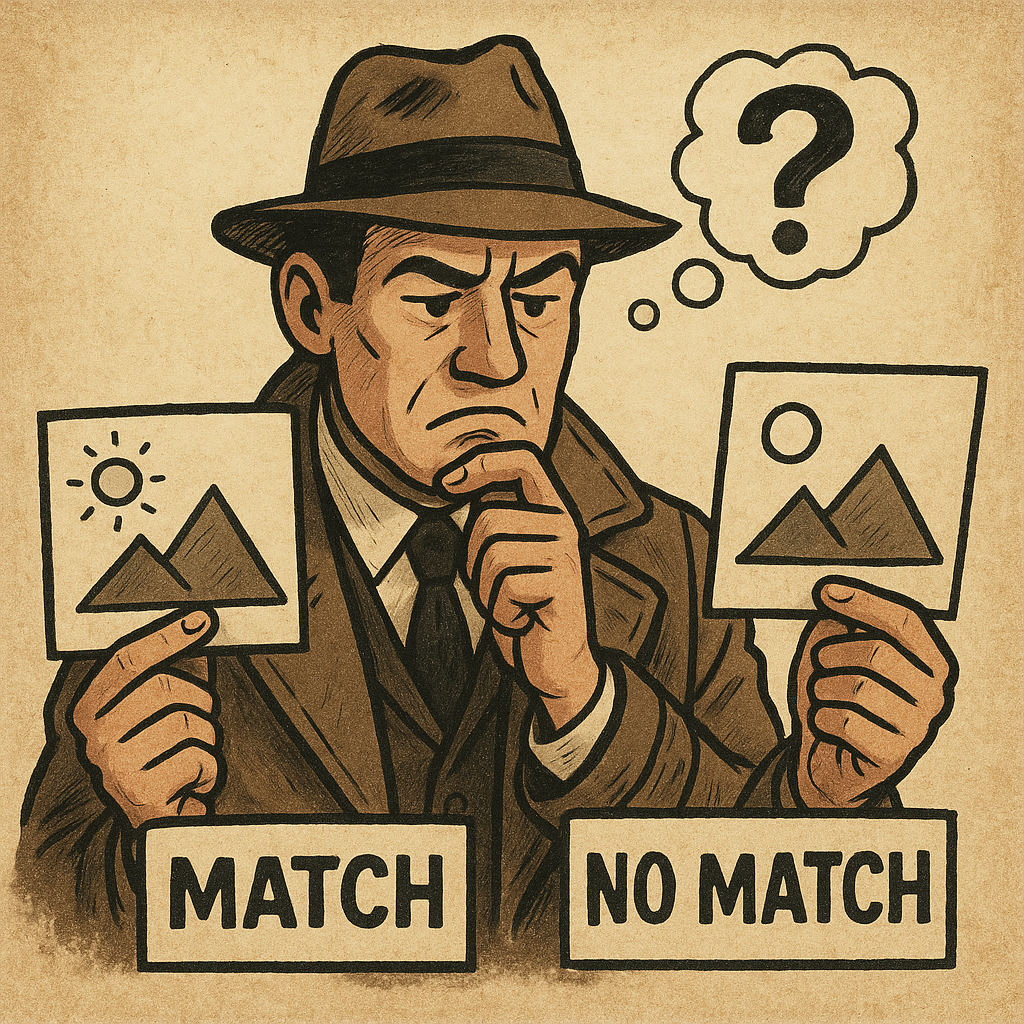

# Treść Zadania

## Wstęp

W świecie rzeczywistym, ogromna większość dostępnych obrazów nie posiada przypisanych etykiet. Proces ich ręcznego oznaczania jest kosztowny, czasochłonny i często niemożliwy do przeprowadzenia w odpowiedniej skali. Tymczasem wiele zastosowań – od diagnostyki medycznej po rozpoznawanie obiektów w środowiskach przemysłowych – wymaga wysokiej jakości klasyfikatorów zdolnych do działania na danych wizualnych. Powstaje więc kluczowy problem: jak wydobyć informację z danych obrazowych, gdy nie dysponujemy wystarczającą liczbą oznaczonych przykładów?

Rozwiązaniem jest nauka reprezentacji – tworzenie embeddingów, które uchwytują istotne cechy semantyczne obrazów bez potrzeby bezpośredniego nadzoru. Takie embeddingi stanowią fundament dla dalszych etapów przetwarzania, w tym również klasyfikacji. Jednak nie każde embeddingi są równe: kluczowe jest, by były zróżnicowane, bogate informacyjnie i rozdzielcze, umożliwiając późniejsze rozróżnienie klas nawet przy bardzo ograniczonej liczbie przykładów etykietowanych.

## Zadanie

Jako senior Data Scientist w firmie pracującej nad rozwijaniem funkcjonalności Galerii Obrazów na najnowszym telefonie waszej marki: 'IPhone XXXXXXXXD' dostałeś od swojego przełożonego niebanalne zadanie: chcecie grupować obrazy w galerii użytkowników w zależności od tego co się na nich znajduje. Jednak, nie jest to proste zadanie, ponieważ z badań analitycznych wynika, że przeciętny użytkownik dodaje etykiety do zdecydowanie zbyt małej ilość obrazów, by móc wytrenować na niej klasyfikator. Twój szef chciałby wiedzieć, czy ten pomysł jest w ogóle realny do zrealizowania przy tak niedużej ilości danych etykietowanych i dlatego dostarczył ci dwa przykładowe zbiory zdjęć z czyjegoś telefonu (nie dopytywałeś, czy ta osoba wyraziła na to zgodę) - jeden nieetykietowany i drugi, mniejszy już z etykietami nadanymi przez użytkownika.

Twoim zadaniem jest, z pomocą tych zbiorów danych, po pierwsze przygotować model/algorytm **przyporządkowujący embedding o rozmiarze 128 obrazkowi**, a po drugie **ocenić do jakiej klasy należy dany obrazek**.
Żeby nie było za prosto, okazało się, że szef wcześniej dogłębnie przeszukał te dane i zauważył, że obrazki niektórych klas są do siebie trochę podobne, dostarczył ci poniższą listę grup klas:
**[0-4, 5-9, 10-14, 15-19, 20-24, 25-29]** i zażyczył sobie, byś upewnił się, że embeddingi klas wewnątrz tych grup, były jak najbardziej od siebie różne!

## Wymagania

### Ogólny zarys zadania

Dostaniesz dwa zbiory treningowe:
- zbiór treningowy bez etykiet
- zbiór treningowy mniejszy z etykietami
- Oraz zbiór walidacyjny składający się z obrazów z etykietami, natomiast **nie wolno ci używać go do treningu!** Służy on jedynie do ewaluacji rozwiązania, natomiast stosowanie technik takich jak early stopping, lub dostosowywanie hiperparametrów tak, by wynik na zbiorze walidacyjnym był możliwie najwyższy są dozwolone.

Twoim zadaniem jest tak jak było mówione wcześniej przygotować funkcję, które dla zbioru obrazów o kształcie [img_num, 32, 32, 3] zwróci embeddingi dla każdego z nich o kształcie [img_num, 128] oraz przyporządkuje im klasy (zwróci tensor o kształcie [img_num] ze zmiennymi typu int oznaczającymi klasy do których należą dane próbki.

### Sposób oceny

Twoje rozwiązanie będzie oceniane na podstawie dwóch metryk:
1. Accuracy - dokładność przyporządkowania klas do obrazków. **Accuracy musi być osiągnięte tylko i wyłącznie z użyciem wygenerowanych przez ciebie embeddingów. W przeciwnym razie, wygenerowane embeddingi byłby bezużyteczne.**
2. Average Groups Embeddings Distance - czyli metryka którą wymyśliłem na potrzeby zadania, polegająca na tym, że dla każdej klasy liczymy uśreniony embedding, potem dla wcześniej wskazanych grup klas: [0-4, 5-9, 10-14, 15-19, 20-24, 25-29], liczymy *cosine similarity* pomiędzy każdą jedną parą embeddingów klas w danej grupie i uśredniamy to cosine similarity dla każdej grupy osobno, a potem uśredniamy te wyniki dla każdej grupy pomiędzy sobą co daje nam liczbę z zakresu [-1,1] reprezentującą uśrednione *cosine similairy* pomiędzy grupami. My chcemy by embeddingi w każdej z grup były możliwie jak najbardziej różne, niezależne, więc w tym zadaniu, będziecie dążyli by ta metryka była możliwie bliska zera.

#### Metryki oceny rozwiązania

##### 1. Accuracy Score (A)

Accuracy przekształcana jest do wartości w przedziale [0, 1] według zasad:

- Jeśli `accuracy < 0.14`, to `A = 0`
- Jeśli `accuracy > 0.19`, to `A = 1`
- Jeśli `0.14 ≤ accuracy ≤ 0.19`, to wartość rośnie liniowo

##### 2. Average Groups Embeddings Distance (G)

Mierzy średnią *cosine similarity* wewnątrz zdefiniowanych grup klas. Dążymy do wartości bliskiej 0 (czyli do wewnętrznej ortogonalności embeddingów).

Niech `AGED` oznacza obliczoną średnią wartość *cosine similarity* w grupach, a `|AGED|` to jej wartość bezwzględna.

Score przekształcany jest do wartości w przedziale [0, 100] według zasad:

- Jeśli `|AGED| > 0.7`, to `G = 0`
- Jeśli `|AGED| < 0.2`, to `G = 100`
- Jeśli `0.2 ≤ |AGED| ≤ 0.7`, to wartość rośnie liniowo

##### 3. Ostateczny wynik

Końcowy wynik `S` to iloczyn obu skalowanych wyników:

S = A * G


gdzie:

- \( A należy do: [0, 1] \)
- \( G należy do: [0, 100] \)
- \( S należy do: [0, 100] \)


**Spokojnie, dostarczyłem funkcję liczącą wynik na dole notebooka**

## Ograniczenia

- Twój notebook nie może się wykonywać dłużej niż **10min w środowisku z dostępnym GPU na platformie Google Colab** (Szacuję, że improtowanie bibliotek oraz pobieranie danych to ok. 1min)
- Wolno korzystać z bibliotek: **torch, torchvision, scikit-learn, numpy, cv2, scipy, xgboost** oraz bibliotek wbudowanych w pythona, lub nie służących do przygotowania samego rozwiązania, a bardziej zwiększenia wygody pracy np. tqdm
- Nie wolno ręcznie etykietować danych
- Nie wolno używać danych innych niż te dostarczone przeze mnie, pobierane automatycznie w notebooku
- Nie zmieniaj komórek, w których jest napisane, by tego nie robić
- Życzę powodzenia i miłej zabawy :)

# Implementacja rozwiązania

## Import bibliotek

In [15]:
# =================== NIE ZMIENIAJ TEJ KOMÓRKI =====================

import torch
import torch.nn.functional as F
import torchvision
import numpy as np
import random
import sklearn
import gdown

In [16]:
# ------------------- TĄ KOMÓRKĘ AKURAT MOŻESZ ZMIENIĆ -------------

torch.manual_seed(11)
np.random.seed(11)
random.seed(11)

## Przygotowanie danych

In [18]:
# =================== NIE ZMIENIAJ TEJ KOMÓRKI (znaczy, jakby link nie działał to spróbuj inne) =====================

# https://drive.google.com/drive/folders/1ZD9CHurUuMhcitBMR1VpR7UcxbFXldr8
# https://drive.google.com/drive/folders/1rH21o5c73twohRqHoVw57D99x5Z-Ynan?usp=sharing

gdown.download_folder('https://drive.google.com/drive/folders/1iNltuJy--UpWMf9WChLPfEUg0ISnjneg?usp=sharing', quiet=False, use_cookies=False)

Retrieving folder contents


Processing file 1QKnp5CgDWAuf0UY1btmEHOYOuhuvO7Vd dataset_train_labeled_imgs.pt
Processing file 1V7z54EbNsQGfJYCYG3aQAe_lxb__2joZ dataset_train_labeled_labels.pt
Processing file 14k0sPx8-EsjUqwWg_0Km8yiDZ9MDjVy_ dataset_train_unlabeled_imgs.pt
Processing file 1DHlH_0pxeV6k_X_CJZhOjyGcayJI0HzP dataset_validation_imgs.pt
Processing file 1oQMyhrXTzepoVyP4Vy2qU5a-IAmKIN2S dataset_validation_labels.pt
Processing file 1VO8QeFcWtWlipX2prbajS0SgKO8wz_Jc det_img.png


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1QKnp5CgDWAuf0UY1btmEHOYOuhuvO7Vd
To: /content/poor_representations_data/dataset_train_labeled_imgs.pt
100%|██████████| 679k/679k [00:00<00:00, 110MB/s]
Downloading...
From: https://drive.google.com/uc?id=1V7z54EbNsQGfJYCYG3aQAe_lxb__2joZ
To: /content/poor_representations_data/dataset_train_labeled_labels.pt
100%|██████████| 2.42k/2.42k [00:00<00:00, 5.53MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=14k0sPx8-EsjUqwWg_0Km8yiDZ9MDjVy_
From (redirected): https://drive.google.com/uc?id=14k0sPx8-EsjUqwWg_0Km8yiDZ9MDjVy_&confirm=t&uuid=7487e4b0-c988-4dbc-854c-15057a0e5062
To: /content/poor_representations_data/dataset_train_unlabeled_imgs.pt
100%|██████████| 54.0M/54.0M [00:00<00:00, 69.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1DHlH_0pxeV6k_X_CJZhOjyGcayJI0HzP
To: /content/poor_representations_dat

['/content/poor_representations_data/dataset_train_labeled_imgs.pt',
 '/content/poor_representations_data/dataset_train_labeled_labels.pt',
 '/content/poor_representations_data/dataset_train_unlabeled_imgs.pt',
 '/content/poor_representations_data/dataset_validation_imgs.pt',
 '/content/poor_representations_data/dataset_validation_labels.pt',
 '/content/poor_representations_data/det_img.png']

In [ ]:
# =================== NIE ZMIENIAJ TEJ KOMÓRKI =====================

dir_name = "poor_representations_data"

train_unlabeled_imgs = torch.load(f"{dir_name}/dataset_train_unlabeled_imgs.pt", weights_only=False)
train_labeled_imgs = torch.load(f"{dir_name}/dataset_train_labeled_imgs.pt", weights_only=False)
validation_imgs = torch.load(f"{dir_name}/dataset_validation_imgs.pt", weights_only=False)

train_labeled_labels = torch.load(f"{dir_name}/dataset_train_labeled_labels.pt", weights_only=False)
validation_labels =torch.load(f"{dir_name}/dataset_validation_labels.pt", weights_only=False)

## Przykładowe rozwiązanie

In [ ]:
# =================== NIE ZMIENIAJ TEJ KOMÓRKI =====================

def dummy_train_model():
    return

def dummy_get_embeddings(images):
    n = images.shape[0]
    return torch.randn(n, 128)

def dummy_get_classes(embeddings):
    n = embeddings.shape[0]
    return torch.randint(0, 30, (n,))

In [ ]:
# =================== NIE ZMIENIAJ TEJ KOMÓRKI =====================

dummy_train_model()

## Miejsce na Twoje rozwiązanie

In [ ]:
# Tutaj możesz sobie zadeklarować dowolne zmienne globalne lub zaimportować potrzebne biblioteki (tylko te dozwolone w treści zadania):

import xgboost as RandomForestClassifier # :)

model = None
some_random_threshold = None

class Dataset():
    def __init__(self):
        self.data = "data"

In [ ]:
# Tutaj zaimplementuj swoje rozwiązanie w postaci funkcji do trenowania modelu (jeśli jakiś trenujesz)
# i funkcję zwracające embeddingi obrazków oraz funkcję przyporządkowującą im labelki na podstawie embeddingów

def train_model():
    pass

def get_embeddings(images):
    """
    Dla danego zbioru obrazów o kształcie [img_num, 32, 32, 3], funkcja zwraca:
    - embeddingi dla każdego obrazu o kształcie [img_num, 128]
    """
    pass

def get_classes(embeddings):
    """
    Dla danego zbioru embeddingów o kształcie [img_num, 128], funkcja zwraca:
    - tensor klas dla każdego obrazu o kształcie [img_num], gdzie każda wartość to int oznaczający klasę próbki
    """
    pass

In [ ]:
# Tutaj trenuj model z pomocą wcześniej przygotowanej funkcji

train_model()

## Funkcje ewaluujące

In [8]:
# =================== NIE ZMIENIAJ TEJ KOMÓRKI =====================

def score_function(accuracy, avg_distance):
    s1 = max(min(accuracy - 0.14, 0.05), 0) * 20
    s2 = 100 - min(max(abs(avg_distance) - 0.2, 0), 0.5) * 200

    return s1 * s2

In [13]:
print(score_function(0.2129, 0.6))

20.0


In [ ]:
# =================== NIE ZMIENIAJ TEJ KOMÓRKI =====================

def compute_similar_class_distances_from_embeddings(embeddings: torch.Tensor, labels: torch.Tensor):
    """
    Args:
        embeddings (Tensor): shape [num_samples, embedding_dim]
        labels (Tensor): shape [num_samples]
    Returns:
        List[float]: average cosine distances between class mean embeddings in groups of 5 classes
                     (i.e., groups: 0-4, 5-9, ..., 25-29)
    """
    labels = torch.tensor(labels)
    class_means = {}
    for label in labels.unique():
        mask = labels == label
        class_means[int(label.item())] = embeddings[mask].mean(dim=0)

    distances = []
    for g in range(0, 30, 5):
        group = list(range(g, g + 5))
        pairwise = []
        for i in range(len(group)):
            for j in range(i + 1, len(group)):
                l1, l2 = group[i], group[j]
                e1 = class_means[l1].unsqueeze(0)
                e2 = class_means[l2].unsqueeze(0)
                d = F.cosine_similarity(e1, e2, dim=1)
                pairwise.append(d.item())
        avg_distance = sum(pairwise) / len(pairwise)
        distances.append(avg_distance)

    return distances

In [ ]:
# =================== NIE ZMIENIAJ TEJ KOMÓRKI =====================

def grade_solution(get_embeddings_func, get_classes_func, imgs, labels):
    embeddings = get_embeddings_func(imgs)

    assert embeddings.shape[1] == 128

    classes = get_classes_func(embeddings)

    correct_classifications = (labels == classes).int()
    accuracy = torch.sum(correct_classifications) / len(correct_classifications)

    embedding_dists = compute_similar_class_distances_from_embeddings(embeddings, labels)
    embeddings_dists_result = sum(embedding_dists)/len(embedding_dists)

    final_score = score_function(accuracy, embeddings_dists_result)

    print(f"Your accuracy is: {accuracy:.4f}, your average_grouped_embeddings_distance is: {embeddings_dists_result:.4f}. It gives you score of: {final_score}/100 points")

## Ewaluacja przykładowego rozwiązania, oraz Twojego rozwiązania

In [ ]:
# =================== NIE ZMIENIAJ TEJ KOMÓRKI =====================

print("Wynik rozwiązania przykładowego: ")
grade_solution(dummy_get_embeddings, dummy_get_classes, validation_imgs, validation_labels)

Wynik rozwiązania przykładowego: 
Your accuracy is: 0.0333, your average_grouped_embeddings_distance is: 0.0169. It gives you score of: 0/100 points


In [ ]:
# =================== NIE ZMIENIAJ TEJ KOMÓRKI =====================

print("Wynik Twojego rozwiązania: ")
grade_solution(get_embeddings, get_classes, validation_imgs, validation_labels)

Wynik Twojego rozwiązania: 


AttributeError: 'NoneType' object has no attribute 'shape'